<a href="https://colab.research.google.com/github/boredanon/machine-learning2023-2/blob/main/titanic_lab_jose_del_solar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Investigar Dataset Titanic
Jupyter Notebook (Descripción del dataset en texto)
Cargar/Mostrar Parte del Contenido
Dividir datos
entrenar decision tree
acc f1-score sobre el test
visualizar arbol
predict (test al azar)

# Description of Titanic Dataset

Lorem ipsum

# Exercise

1) Load the content and show part of it using either head or sample.

In [58]:
import numpy as np #wow we're going to need linear algebra who would have guessed
import pandas as pd #Data processing
import matplotlib.pyplot as plt #Python graphs

ds = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
ds.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.00,0,1,347054,10.4625,G6,S
614,615,0,3,"Brocklebank, Mr. William Alfred",male,35.00,0,0,364512,8.0500,NaN,S
123,124,1,2,"Webber, Miss. Susan",female,32.50,0,0,27267,13.0000,E101,S
48,49,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,21.6792,NaN,C
718,719,0,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.00,0,0,C.A. 24580,10.5000,NaN,S
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
84,85,1,2,"Ilett, Miss. Bertha",female,17.00,0,0,SO/C 14885,10.5000,NaN,S


2) Split the data into "train" and "test"

In [59]:
from sklearn.model_selection import train_test_split

ds = ds.dropna() #Remove NaN values.
ds = ds.drop(columns=['Name', 'Cabin', 'Ticket', 'PassengerId', 'Embarked'])
ds = pd.get_dummies(data=ds, drop_first=True)

ds.sample(10)

X = ds.drop(columns='Survived')
Y = ds.Survived

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


3) Train Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

model = DecisionTreeClassifier(max_depth=4)
_ = model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

4) Accuracy, F1-score

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))


Accuracy: 0.7837837837837838
F1 Score: 0.84


[Text(0.4583333333333333, 0.9, 'Sex_male <= 0.5\ngini = 0.432\nsamples = 146\nvalue = [46, 100]'),
 Text(0.25, 0.7, 'Age <= 3.0\ngini = 0.108\nsamples = 70\nvalue = [4, 66]'),
 Text(0.16666666666666666, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.5, 'Fare <= 11.488\ngini = 0.057\nsamples = 68\nvalue = [2, 66]'),
 Text(0.16666666666666666, 0.3, 'Age <= 45.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.08333333333333333, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.3, 'Fare <= 149.035\ngini = 0.03\nsamples = 65\nvalue = [1, 64]'),
 Text(0.4166666666666667, 0.1, 'gini = 0.0\nsamples = 55\nvalue = [0, 55]'),
 Text(0.5833333333333334, 0.1, 'gini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.6666666666666666, 0.7, 'Age <= 17.5\ngini = 0.494\nsamples = 76\nvalue = [42, 34]'),
 Text(0.5833333333333334, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.75, 0.5, 'Fare 

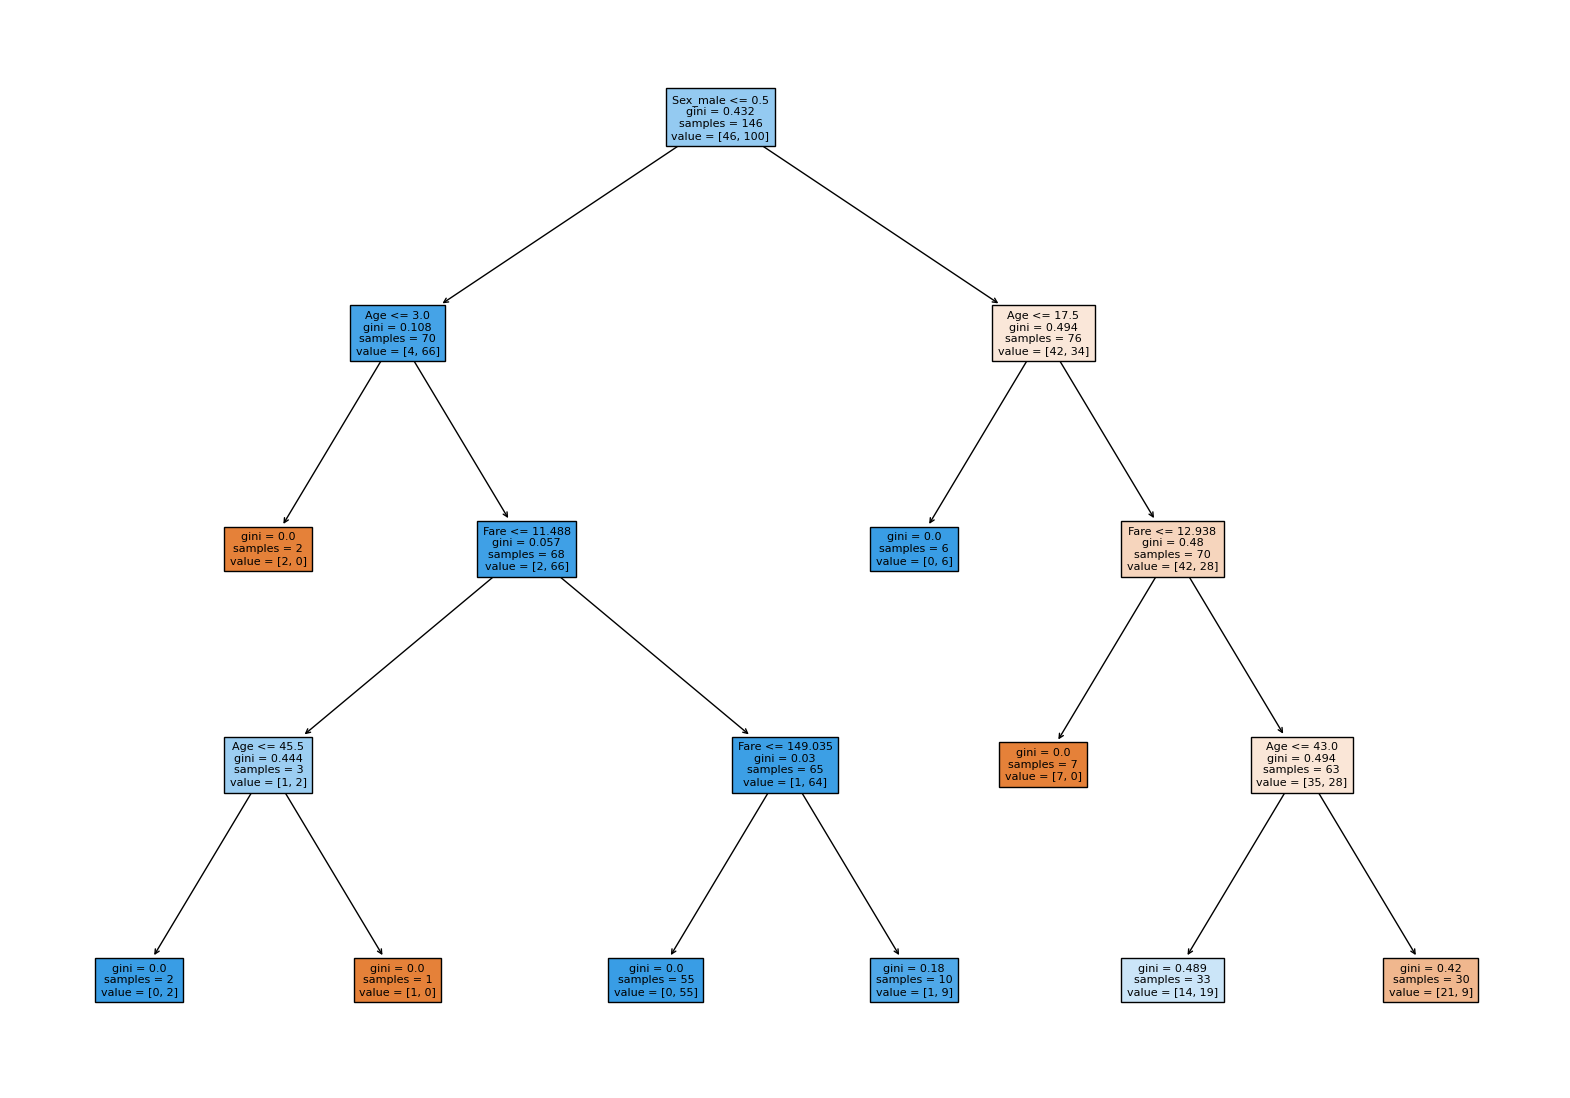

In [63]:
plt.figure(figsize=(20, 14))
plot_tree(decision_tree=model, feature_names=X_test.columns, filled=True, fontsize=8)